# Parts of Speech Experiment

In [1]:
from scripts.imports import *

out = Exporter(
    paths['outdir'], 
    'pos_experiment'
)

In [2]:
df_sg =  df[
    (df.n_times == 1)
    & (df.times_POS != 'PREP')
]

In [3]:
out.number(
    df.shape[0],
    'N_alltimephrase',
)

'3,648'

In [4]:
out.number(
    df_sg.shape[0],
    'N_phrase_POS',
)

'3,166'

We also have the phrase dataframe, which is a large dataset of all parsed phrases (>99%) in the HB.

# Modifier Counts

In [5]:
head_modi_ct = pivot_ct(
    df_sg,
    'times_utf8',
    'modtag2',
)
head_modi_ct.head()

modtag2,Ø,DEF,DEMON,C,NUM+PL,ORDN,NUM,PL+C,KL+DEF,PL+DEMON,...,QUANT+DEF,NUM+PL+C,QUANT+PL+SFX,QUANT,QUANT+DEF+PL,QUANT+PL+C,KL+DEMON,DEF+C,KL+SFX,QUANT+PL
times_utf8,,,,,,,,,,,,,,,,,,,,,
יֹום,6,231,331,110,113,109,34,52,42,37,...,1,3,2,0,2,2,1,1,0,1
עַתָּה,348,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
שָׁנָה,0,7,5,61,60,23,109,1,0,2,...,0,3,1,0,0,0,0,0,0,0
עֹולָם,164,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
עֵת,7,12,60,32,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
head_modi_ct2 = head_modi_ct.loc[head_modi_ct.sum(1) >= 5]\
    .rename_axis(columns='modifier', index='time head')

In [7]:
out.number(
    head_modi_ct.shape[0],
    'N_alllexs_POS',
)

'94'

In [8]:
out.number(
    head_modi_ct.shape[1],
    'N_allmodis_POS',
)

'30'

In [9]:
out.number(
    head_modi_ct2.shape[0],
    'N_samplexs_POS',
)

'32'

In [10]:
out.number(
    head_modi_ct2.size,
    'N_sampsize_POS',
)

'960'

In [43]:
out.table(
    head_modi_ct.iloc[:10, :10]\
        .rename_axis(index='time', columns='modifier'),
    'headpos_mod_ct',
    caption='Time Word and Modifier Frequencies',
    adjustbox=True,
    hebaxis=0,
)    

modifier,Ø,DEF,DEMON,C,NUM+PL,ORDN,NUM,PL+C,KL+DEF,PL+DEMON
time,,,,,,,,,,
\texthebrew{יֹום},6,231,331,110,113,109,34,52,42,37
\texthebrew{עַתָּה},348,0,2,0,0,0,0,0,0,0
\texthebrew{שָׁנָה},0,7,5,61,60,23,109,1,0,2
\texthebrew{עֹולָם},164,3,0,0,0,0,0,1,0,0
\texthebrew{עֵת},7,12,60,32,0,0,0,0,0,2
\texthebrew{לַיְלָה},44,42,19,0,0,0,2,0,11,0
\texthebrew{בֹּקֶר},14,94,0,0,0,0,0,0,0,0
\texthebrew{עֶרֶב},1,72,0,0,0,1,0,0,0,0
\texthebrew{אָז},71,0,0,0,0,0,0,0,0,0


In [42]:
head_modi_pr = head_modi_ct2.div(head_modi_ct2.sum(1), 0)

out.table(
    head_modi_pr.iloc[:10, :10]\
        .rename_axis(index='time', columns='modifier')
        .mul(100).round().astype(int).astype(str)+'%',
    'pos_modi_pc',
    caption='Head and Modifier Percentages (Top Ten, rounded)',
    adjustbox=True,
    hebaxis=0,
)

modifier,Ø,DEF,DEMON,C,NUM+PL,ORDN,NUM,PL+C,KL+DEF,PL+DEMON
time,,,,,,,,,,
\texthebrew{יֹום},0%,18%,26%,9%,9%,9%,3%,4%,3%,3%
\texthebrew{עַתָּה},99%,0%,1%,0%,0%,0%,0%,0%,0%,0%
\texthebrew{שָׁנָה},0%,3%,2%,22%,22%,8%,39%,0%,0%,1%
\texthebrew{עֹולָם},95%,2%,0%,0%,0%,0%,0%,1%,0%,0%
\texthebrew{עֵת},5%,9%,43%,23%,0%,0%,0%,0%,0%,1%
\texthebrew{לַיְלָה},34%,33%,15%,0%,0%,0%,2%,0%,9%,0%
\texthebrew{בֹּקֶר},13%,85%,0%,0%,0%,0%,0%,0%,0%,0%
\texthebrew{עֶרֶב},1%,97%,0%,0%,0%,1%,0%,0%,0%,0%
\texthebrew{אָז},100%,0%,0%,0%,0%,0%,0%,0%,0%,0%


## PCA Cluster Experiment

In [32]:
from sklearn.cluster import KMeans

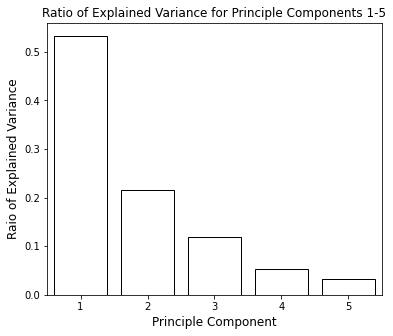

explained variance:
[0.5327473  0.21668687 0.11855422 0.05365394 0.03205258]


In [33]:
comp_df, load_df, var = apply_pca(head_modi_pr, 0, 1, components=5, scale=False)

In [34]:
pc1_var = round(var[0]*100)
pc2_var = round(var[1]*100)

In [35]:
# cluster with K-means

wcss = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(comp_df.values[:, :3])
    wcss.append(kmeans_pca.inertia_)

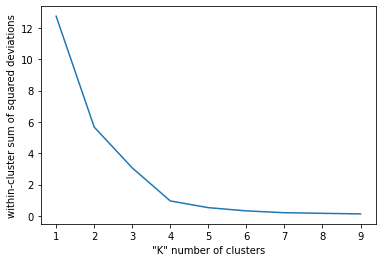

In [36]:
# determine K with elbow method
fig, ax = plt.subplots()
ax.plot(range(1,10), wcss)
ax.set_xlabel('"K" number of clusters')
ax.set_ylabel('within-cluster sum of squared deviations')
out.plot('kmeans_elbow')

In [37]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(comp_df.values[:, :3])

KMeans(n_clusters=4, random_state=42)

In [38]:
comp_df['K-Means Clusters'] = kmeans_pca.labels_ + 1

In [44]:
comp_df.head()

,PC1,PC2,PC3,PC4,PC5,K-Means Clusters
time head,,,,,,
יֹום,0.443254,0.015903,0.204868,0.050085,0.155391,3
עַתָּה,-0.545661,-0.020057,-0.049130,0.011472,0.002361,2
שָׁנָה,0.395172,0.133244,0.364335,-0.052551,0.271027,3
עֹולָם,-0.502633,-0.026501,-0.047707,0.012389,0.005453,2
עֵת,0.377810,0.071140,0.330164,-0.032581,0.019095,3


It looks like 4 is the ideal K.

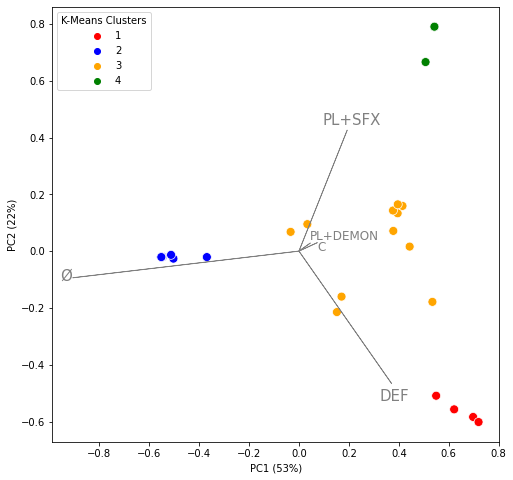

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    ax=ax,
    x = comp_df.iloc[:,0],
    y = comp_df.iloc[:,1],
    hue=comp_df['K-Means Clusters'],
    palette=['red', 'blue', 'orange', 'green'],
    s=80,
    edgecolor='white'
)

top_loadings = load_df.abs().sum().sort_values(ascending=False).index[:5]
texts = []
offsets={
    'PL+DEMON': (0, 0.01, 12),
    'C': (0, -0.03, 12),
    'DEF': (-0.05, -0.06, 15),
    'PL+SFX': (-0.1, 0.02, 15),
    'Ø': (-0.05, -0.01, 15),
}
for feature in top_loadings:
    x_off, y_off, size = offsets.get(feature, (0,0,15)) # config offsets / size
    fx, fy = load_df[feature][:2] * 2
    plt.arrow(0, 0, fx, fy, linewidth=0.7, color='grey', head_width=0)
    texts.append(
        plt.text(
            fx+x_off, fy+y_off, 
            feature, color='grey', 
            size=size
        )
    )
    
ax.set_xlabel(f'PC1 ({pc1_var}%)')
ax.set_ylabel(f'PC2 ({pc2_var}%)')
    
out.plot(
    'PCA_scatter_loadings'
)

In [45]:
comp_df

,PC1,PC2,PC3,PC4,PC5,K-Means Clusters
time head,,,,,,
יֹום,0.443254,0.015903,0.204868,0.050085,0.155391,3
עַתָּה,-0.545661,-0.020057,-0.049130,0.011472,0.002361,2
שָׁנָה,0.395172,0.133244,0.364335,-0.052551,0.271027,3
עֹולָם,-0.502633,-0.026501,-0.047707,0.012389,0.005453,2
עֵת,0.377810,0.071140,0.330164,-0.032581,0.019095,3
לַיְלָה,0.170525,-0.160207,-0.015947,0.037878,0.056902,3
בֹּקֶר,0.549399,-0.509208,-0.225849,0.001036,-0.014729,1
עֶרֶב,0.697405,-0.583897,-0.255468,-0.000985,-0.014352,1
אָז,-0.551065,-0.020947,-0.051328,0.010688,0.001044,2


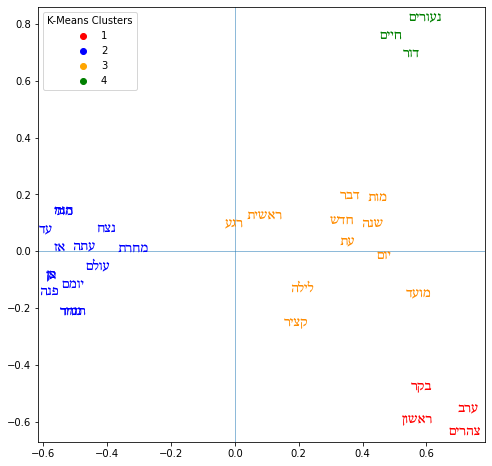

In [22]:
fig, ax2 = plt.subplots(figsize=(8, 8))
cl2color = {1:'red', 2:'blue', 3:'darkorange', 4:'green'}
x, y = (comp_df.iloc[:,0], comp_df.iloc[:,1])
ax2.scatter(x, y, facecolor=[], s=2)
handles, labels = ax.get_legend_handles_labels()
ax2.legend(handles=handles, labels=labels, title='K-Means Clusters')

texts = []

for lexeme in comp_df.index:
    clust = comp_df['K-Means Clusters'][lexeme]
    color = cl2color[clust]
    tx, ty = comp_df.loc[idx[lexeme]][:2]
    show_lex = get_display(lexeme)
    texts.append(
        plt.text(
            tx, ty, 
            show_lex, 
            size=14, 
            fontfamily='SBL Biblit',
            color=color,
        )
    )
    
adjust_text(texts)

ax.set_xlabel(f'PC1 ({pc1_var}%)')
ax.set_ylabel(f'PC2 ({pc2_var}%)')

ax2.axhline(linewidth=0.5)
ax2.axvline(linewidth=0.5)

out.plot(
    'PCA_textscatter'
)